# About Dataset
* the dataset is about the bank customer's personal information, i.e. age, education, profession, services they used from bank etc.
* other details are  about bank services, loans and campaigns for marketing.
* analysis to be done whether the customers are expected to pay the loan deposit or not.
* NOTE THIS DATASET HAS BEEN TAKEN FROM KAGGLE
* Dataset link: https://www.kaggle.com/datasets/akashtyagi011/bank-data


* Prepared by Aqeel Ahmad     Roll No: 2k22/CSE/23

# STEP-01

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

# STEP-02

In [2]:
df=pd.read_csv('BankCustomerData.csv')

# STEP-03

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In the context of this dataset:

- **Dependent Variable**: This is the variable that you are trying to predict or explain. In this dataset, the dependent variable is `term_deposit`, which indicates whether the client has subscribed to a term deposit (yes or no).

- **Independent Variables**: These are the variables that you use to predict or explain the dependent variable. In this dataset, the independent variables include age, job, marital status, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, and poutcome.

In [4]:
df.tail()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
42634,21,student,single,secondary,no,2488,no,no,telephone,12,jan,661,2,92,1,success,yes
42635,87,retired,married,primary,no,2190,no,no,telephone,12,jan,512,2,-1,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718,no,no,cellular,13,jan,278,4,97,1,other,no
42637,22,student,single,secondary,no,254,no,no,cellular,13,jan,143,2,-1,0,unknown,yes
42638,32,management,single,tertiary,no,1962,no,no,cellular,13,jan,130,1,-1,0,unknown,no


In [5]:
df.shape


(42639, 17)

In [6]:
df.info


<bound method DataFrame.info of        age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no     2143     yes   no   
1       44    technician   single  secondary      no       29     yes   no   
2       33  entrepreneur  married  secondary      no        2     yes  yes   
3       47   blue-collar  married    unknown      no     1506     yes   no   
4       33       unknown   single    unknown      no        1      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
42634   21       student   single  secondary      no     2488      no   no   
42635   87       retired  married    primary      no     2190      no   no   
42636   34   blue-collar  married    primary      no     6718      no   no   
42637   22       student   single  secondary      no      254      no   no   
42638   32    management   single   tertiary      no     1962      no   no   

         contact  day month  du

In [7]:
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
duration         int64
campaign         int64
pdays            int64
previous         int64
poutcome        object
term_deposit    object
dtype: object

In [8]:
df.age

0        58
1        44
2        33
3        47
4        33
         ..
42634    21
42635    87
42636    34
42637    22
42638    32
Name: age, Length: 42639, dtype: int64

In [9]:
df[['age','job']]

,age,job
0,58,management
1,44,technician
2,33,entrepreneur
3,47,blue-collar
4,33,unknown
...,...,...
42634,21,student
42635,87,retired
42636,34,blue-collar
42637,22,student


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000,42639.000000
mean,40.788808,1331.863951,15.854781,255.957504,2.816412,34.169141,0.465442
std,10.200236,3011.537676,8.293901,258.361368,3.163564,92.041713,2.166705
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,62.000000,8.000000,101.000000,1.000000,-1.000000,0.000000
50%,39.000000,429.000000,16.000000,177.000000,2.000000,-1.000000,0.000000
75%,48.000000,1381.500000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,536.000000,275.000000


# missing data from data frame

In [11]:


df = pd.read_csv('BankCustomerData.csv', na_values=['NaN', -1, 'Not a number'])


In [12]:
df.isnull().sum()

age                 0
job                 0
marital             0
education           0
default             0
balance            50
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays           36082
previous            0
poutcome            0
term_deposit        0
dtype: int64

In [13]:
df.dropna( axis=0, inplace=False)
# it would delete all colomns with an NaN columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
24060,33,admin.,married,tertiary,no,882.0,no,no,telephone,21,oct,39,1,151.0,3,failure,no
24062,42,admin.,single,secondary,no,-247.0,yes,yes,telephone,21,oct,519,1,166.0,1,other,yes
24064,33,services,married,secondary,no,3444.0,yes,no,telephone,21,oct,144,1,91.0,4,failure,yes
24072,36,management,married,tertiary,no,2415.0,yes,no,telephone,22,oct,73,1,86.0,4,other,no
24077,36,management,married,tertiary,no,0.0,yes,no,telephone,23,oct,140,1,143.0,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42625,66,retired,single,tertiary,no,0.0,no,no,cellular,12,jan,105,1,92.0,2,failure,no
42627,28,services,single,secondary,no,168.0,no,no,cellular,12,jan,387,1,194.0,1,other,yes
42633,49,management,married,tertiary,no,1093.0,yes,yes,cellular,12,jan,243,2,91.0,2,success,yes
42634,21,student,single,secondary,no,2488.0,no,no,telephone,12,jan,661,2,92.0,1,success,yes


In [14]:
# rather than getting rid of row/columns we fill holes in a number of ways. 
df.fillna(0,inplace=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,0.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,0.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,0.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,0.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,0.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42634,21,student,single,secondary,no,2488.0,no,no,telephone,12,jan,661,2,92.0,1,success,yes
42635,87,retired,married,primary,no,2190.0,no,no,telephone,12,jan,512,2,0.0,0,unknown,yes
42636,34,blue-collar,married,primary,no,6718.0,no,no,cellular,13,jan,278,4,97.0,1,other,no
42637,22,student,single,secondary,no,254.0,no,no,cellular,13,jan,143,2,0.0,0,unknown,yes


# STEP-04

Original DataFrame:
       age           job  marital  education default  balance housing loan  \
0       58    management  married   tertiary      no   2143.0     yes   no   
1       44    technician   single  secondary      no     29.0     yes   no   
2       33  entrepreneur  married  secondary      no      2.0     yes  yes   
3       47   blue-collar  married    unknown      no   1506.0     yes   no   
4       33       unknown   single    unknown      no      1.0      no   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
42634   21       student   single  secondary      no   2488.0      no   no   
42635   87       retired  married    primary      no   2190.0      no   no   
42636   34   blue-collar  married    primary      no   6718.0      no   no   
42637   22       student   single  secondary      no    254.0      no   no   
42638   32    management   single   tertiary      no   1962.0      no   no   

         contact  day month  duration  camp

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


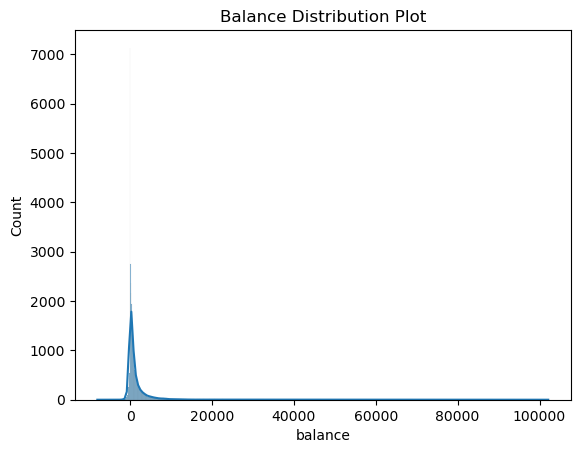

In [15]:
# Create the dataframe from the given data

df = pd.DataFrame(df)

# Check and handle missing values
print("Original DataFrame:")
print(df)

# Replace -1 values with NaN in 'pdays' if necessary
df['pdays'].replace(-1, pd.NA, inplace=True)

# Dropping rows with NaN values in 'balance' for simplicity
df.dropna(subset=['balance'], inplace=True)

# Data distribution plot for Balance
plt.title('Balance Distribution Plot')
sns.histplot(df['balance'], kde=True)
plt.show()

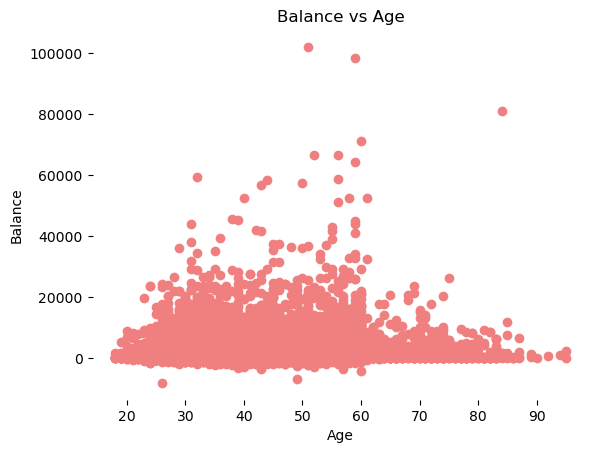

In [16]:
# Relationship between Balance and Age
plt.scatter(df['age'], df['balance'], color='lightcoral')
plt.title('Balance vs Age')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.box(False)
plt.show()

In [17]:

# Splitting variables
X = df[['age']]  # independent variable (Age)
y = df['balance']  # dependent variable (Balance)

# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

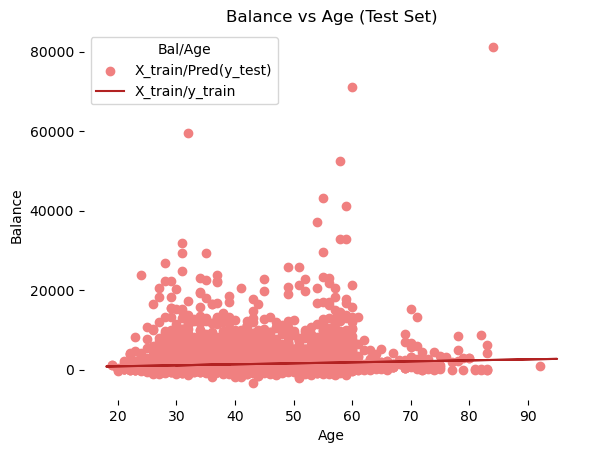

In [19]:
# Prediction on test set
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, y_pred_train, color='firebrick')
plt.title('Balance vs Age (Test Set)')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title='Bal/Age', loc='best', facecolor='white')
plt.box(False)
plt.show()


